In [1]:
import os
import numpy as np
import pandas as pd
import argparse
from helper_fns import data_read_convert_to_np_array, split_train_test, preprocess_text_data, read_label_from_text_file
from Nearest_Neighbour import NearestNeighbour
from projections import projections
from BayesClf import get_ML_params, get_prob, BayesClf
from sklearn.metrics import f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from projections import projections
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [2]:
def experiment_with_random_proj(data_np_2d, label_data, bow=False):
    full_dim = data_np_2d.shape[1]
    red_dim = [2*i for i in range(2,int(full_dim/4)+1)]
    micro_nn = [ ]
    macro_nn = [ ]
    micro_bayes = []
    macro_bayes = []
    
    for dim in red_dim:
        rand_proj = projections(n_initial_features= full_dim, n_final_features=dim)
        red_data = rand_proj.fit(data_np_2d)
        train, train_lab, test, test_lab = split_train_test(red_data, label_data)
        nn = NearestNeighbour()
        nn.fit(train, train_lab)
        pred_lab = nn.predict(test)
        micro_nn.append(f1_score(test_lab, pred_lab, average = "micro"))
        macro_nn.append(f1_score(test_lab, pred_lab, average = "macro"))
        
        b_clf = BayesClf()
        prior,_ = b_clf.fit(train, train_lab,bow)
        pred_lab = b_clf.predict(test)
        micro_bayes.append(f1_score(test_lab, pred_lab, average = "micro"))
        macro_bayes.append(f1_score(test_lab, pred_lab, average = "macro"))
        
    plt.figure(figsize=(10,6))
    plt.xlabel("reduced dimension values")
    plt.plot(red_dim, micro_nn, label="micro")
    plt.plot(red_dim, macro_nn, label = "macro")
    plt.title("nn_classifier")
    plt.legend()
    plt.show()
    plt.figure(figsize=(10,6))
    plt.xlabel("reduced dimension values")
    plt.plot(red_dim, micro_bayes, label="micro")
    plt.plot(red_dim, macro_bayes, label = "macro")
    plt.title("bayes_classifier")
    plt.legend()
    plt.show()
    return micro_nn,macro_nn, micro_bayes, macro_bayes

In [3]:
def experiment_with_random_proj_using_scikit_library(data_np_2d, label_data, bow=False):
    full_dim = data_np_2d.shape[1]
    red_dim = [2*i for i in range(2,int(full_dim/4)+1)]
    micro_nn = [ ]
    macro_nn = [ ]
    micro_bayes = []
    macro_bayes = []
    
    for dim in red_dim:
        rand_proj = projections(n_initial_features= full_dim, n_final_features=dim)
        red_data = rand_proj.fit(data_np_2d)
        train, train_lab, test, test_lab = split_train_test(red_data, label_data)
        nn = KNeighborsClassifier(n_neighbors=1)
        nn.fit(train, train_lab)
        pred_lab = nn.predict(test)
        micro_nn.append(f1_score(test_lab, pred_lab, average = "micro"))
        macro_nn.append(f1_score(test_lab, pred_lab, average = "macro"))
        
        if bow:
            b_clf = MultiNomialNB()
        else:
            b_clf = GaussianNB()
        
        pred_lab = b_clf.fit(train, train_lab).predict(test)
        
        micro_bayes.append(f1_score(test_lab, pred_lab, average = "micro"))
        macro_bayes.append(f1_score(test_lab, pred_lab, average = "macro"))
        
    plt.figure(figsize=(10,6))
    plt.xlabel("reduced dimension values")
    plt.plot(red_dim, micro_nn, label="micro")
    plt.plot(red_dim, macro_nn, label = "macro")
    plt.title("nn_classifier")
    plt.legend()
    plt.show()
    plt.figure(figsize=(10,6))
    plt.xlabel("reduced dimension values")
    plt.plot(red_dim, micro_bayes, label="micro")
    plt.plot(red_dim, macro_bayes, label = "macro")
    plt.title("bayes_classifier")
    plt.legend()
    plt.show()
    return micro_nn,macro_nn, micro_bayes, macro_bayes

In [4]:
data_path = "H:\\sonu\\tipr\\Assignment1\\data\\"

In [5]:
dolph_data = data_read_convert_to_np_array(data_path+"dolphins\\dolphins.csv")
dolph_label = data_read_convert_to_np_array(data_path+"dolphins\\dolphins_label.csv")
# dolph_train, dolph_train_lab, dolph_test, dolph_test_lab = split_train_test(
#     dolph_data, dolph_label)

C:\Users\vissim\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
H:\sonu\tipr\Assignment1\src\BayesClf.py:27: RuntimeWarning: divide by zero encountered in log
  log_density = np.log(np.exp(-0.5 * (((data-params[0])/params[1]) ** 2.0)) * 1/(params[1] * np.sqrt(2*np.pi)))


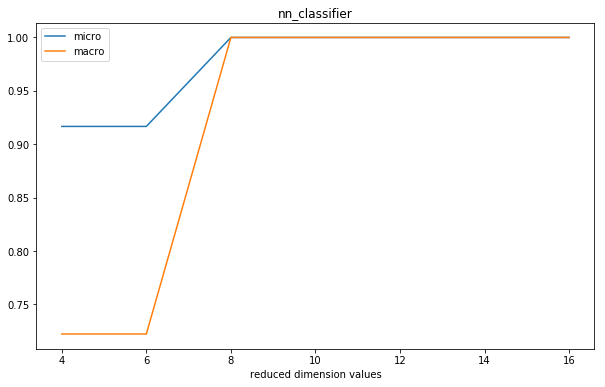

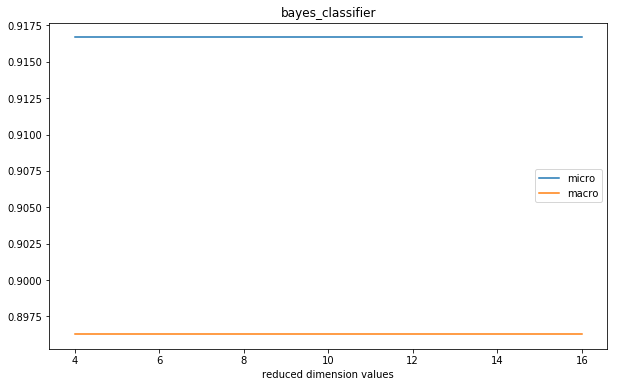

In [6]:
micro_nn,macro_nn, micro_bayes, macro_bayes = experiment_with_random_proj(dolph_data, dolph_label)

C:\Users\vissim\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\vissim\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


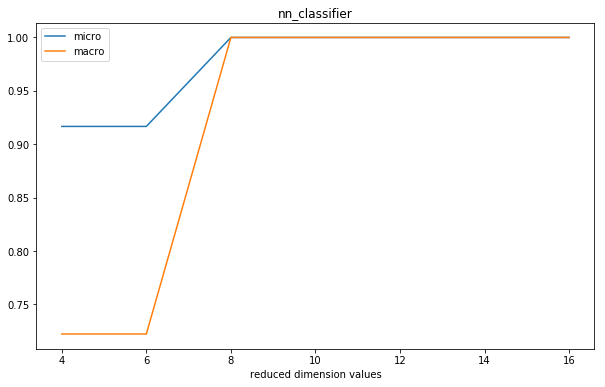

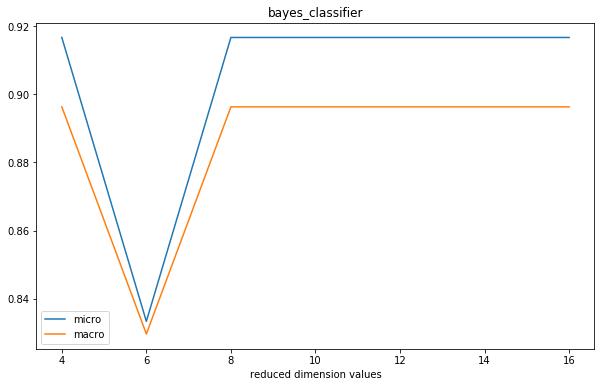

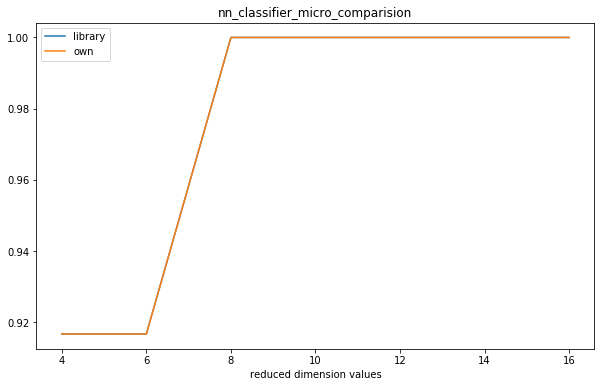

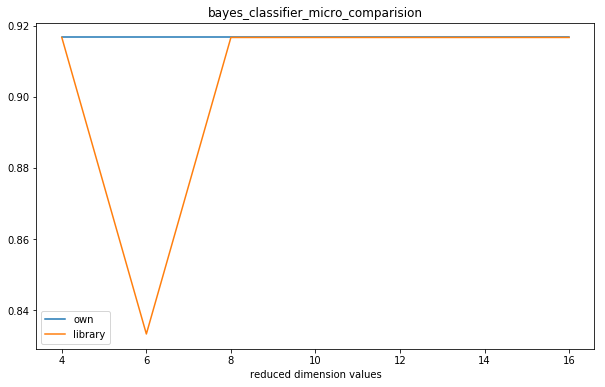

In [9]:
dolph_data = data_read_convert_to_np_array(data_path+"dolphins\\dolphins.csv")
dolph_label = data_read_convert_to_np_array(data_path+"dolphins\\dolphins_label.csv")
lsh_micro_nn,_,lsh_micro_b,_ = experiment_with_random_proj_using_scikit_library(dolph_data, dolph_label)

full_dim = dolph_data.shape[1]
red_dim = [2*i for i in range(2,int(full_dim/4)+1)]
plt.figure(figsize=(10,6))
plt.xlabel("reduced dimension values")
plt.plot(red_dim, lsh_micro_nn, label = "library")
plt.plot(red_dim, micro_nn, label="own")

plt.title("nn_classifier_micro_comparision")
plt.legend()
plt.show()
plt.figure(figsize=(10,6))
plt.xlabel("reduced dimension values")
plt.plot(red_dim, micro_bayes, label="own")
plt.plot(red_dim, lsh_micro_b, label = "library")
plt.title("bayes_classifier_micro_comparision")
plt.legend()
plt.show()

## pubmed dataset, effect of random projection

C:\Users\vissim\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


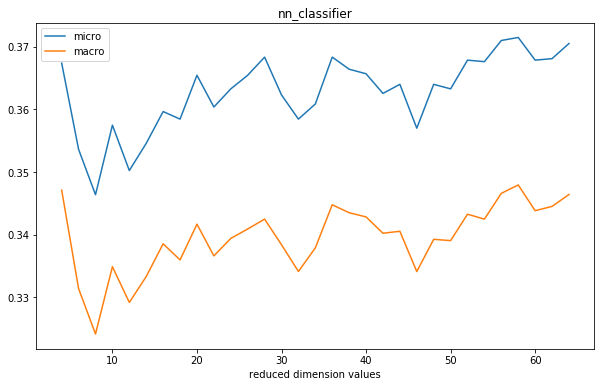

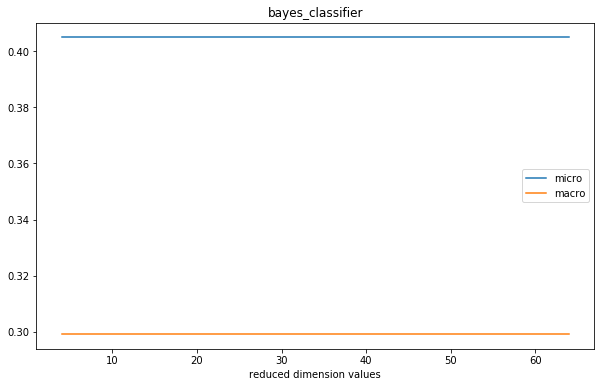

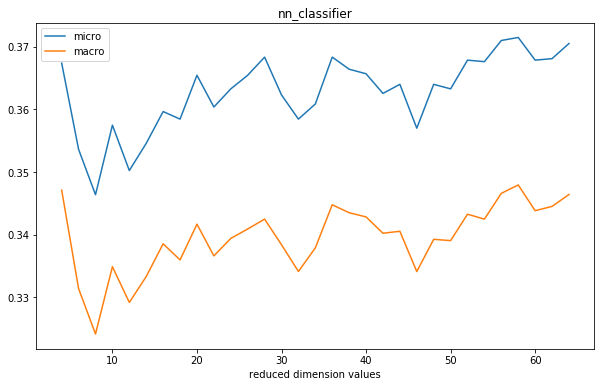

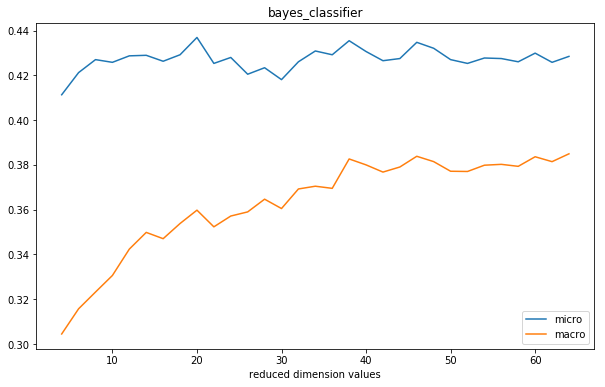

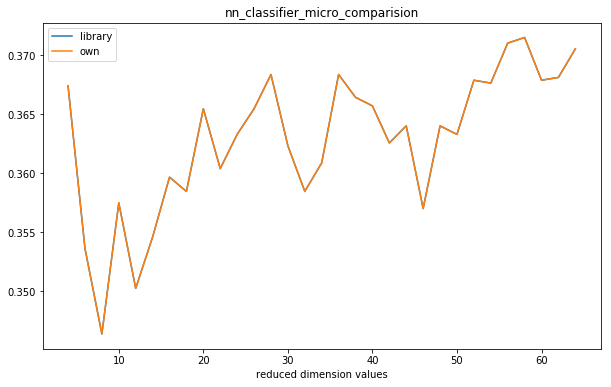

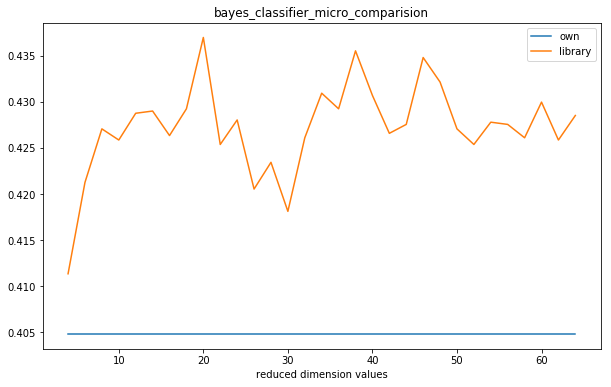

In [10]:
pubmed_data = data_read_convert_to_np_array(data_path+"pubmed\\pubmed.csv")
pubmed_label = data_read_convert_to_np_array(data_path+"pubmed\\pubmed_label.csv")
micro_nn,macro_nn, micro_bayes, macro_bayes = experiment_with_random_proj(pubmed_data, pubmed_label)

dolph_data = data_read_convert_to_np_array(data_path+"pubmed\\pubmed.csv")
dolph_label = data_read_convert_to_np_array(data_path+"pubmed\\pubmed_label.csv")
lsh_micro_nn,_,lsh_micro_b,_ = experiment_with_random_proj_using_scikit_library(dolph_data, dolph_label)

full_dim = dolph_data.shape[1]
red_dim = [2*i for i in range(2,int(full_dim/4)+1)]
plt.figure(figsize=(10,6))
plt.xlabel("reduced dimension values")
plt.plot(red_dim, lsh_micro_nn, label = "library")
plt.plot(red_dim, micro_nn, label="own")

plt.title("nn_classifier_micro_comparision")
plt.legend()
plt.show()
plt.figure(figsize=(10,6))
plt.xlabel("reduced dimension values")
plt.plot(red_dim, micro_bayes, label="own")
plt.plot(red_dim, lsh_micro_b, label = "library")
plt.title("bayes_classifier_micro_comparision")
plt.legend()
plt.show()

## on twitter dataset, effect of random projection

In [12]:
def experiment_with_random_proj(data_np_2d, label_data, bow=False):
    full_dim = data_np_2d.shape[1]
    red_dim = [8*i for i in range(1,int(full_dim/16)+1)]
    micro_nn = [ ]
    macro_nn = [ ]
    micro_bayes = []
    macro_bayes = []
    
    for dim in red_dim:
        rand_proj = projections(n_initial_features= full_dim, n_final_features=dim)
        red_data = rand_proj.fit(data_np_2d)
        train, train_lab, test, test_lab = split_train_test(red_data, label_data)
        nn = NearestNeighbour()
        nn.fit(train, train_lab)
        pred_lab = nn.predict(test)
        micro_nn.append(f1_score(test_lab, pred_lab, average = "micro"))
        macro_nn.append(f1_score(test_lab, pred_lab, average = "macro"))
        
        b_clf = BayesClf()
        prior,_ = b_clf.fit(train, train_lab,bow)
        pred_lab = b_clf.predict(test)
        micro_bayes.append(f1_score(test_lab, pred_lab, average = "micro"))
        macro_bayes.append(f1_score(test_lab, pred_lab, average = "macro"))
        
    plt.figure(figsize=(10,6))
    plt.xlabel("reduced dimension values")
    plt.plot(red_dim, micro_nn, label="micro")
    plt.plot(red_dim, macro_nn, label = "macro")
    plt.title("nn_classifier")
    plt.legend()
    plt.show()
    plt.figure(figsize=(10,6))
    plt.xlabel("reduced dimension values")
    plt.plot(red_dim, micro_bayes, label="micro")
    plt.plot(red_dim, macro_bayes, label = "macro")
    plt.title("bayes_classifier")
    plt.legend()
    plt.show()
    return micro_nn,macro_nn, micro_bayes, macro_bayes

In [20]:
def experiment_with_random_proj_using_scikit_library(data_np_2d, label_data, bow=False):
    full_dim = data_np_2d.shape[1]
    red_dim = [8*i for i in range(1,int(full_dim/16)+1)]
    micro_nn = [ ]
    macro_nn = [ ]
    micro_bayes = []
    macro_bayes = []
    
    for dim in red_dim:
        rand_proj = projections(n_initial_features= full_dim, n_final_features=dim)
        red_data = rand_proj.fit(data_np_2d)
        train, train_lab, test, test_lab = split_train_test(red_data, label_data)
        nn = KNeighborsClassifier(n_neighbors=1)
        nn.fit(train, train_lab)
        pred_lab = nn.predict(test)
        micro_nn.append(f1_score(test_lab, pred_lab, average = "micro"))
        macro_nn.append(f1_score(test_lab, pred_lab, average = "macro"))
        
        if bow:
            b_clf = MultinomialNB()
        else:
            b_clf = GaussianNB()
        
        pred_lab = b_clf.fit(train, train_lab).predict(test)
        
        micro_bayes.append(f1_score(test_lab, pred_lab, average = "micro"))
        macro_bayes.append(f1_score(test_lab, pred_lab, average = "macro"))
        
    plt.figure(figsize=(10,6))
    plt.xlabel("reduced dimension values")
    plt.plot(red_dim, micro_nn, label="micro")
    plt.plot(red_dim, macro_nn, label = "macro")
    plt.title("nn_classifier")
    plt.legend()
    plt.show()
    plt.figure(figsize=(10,6))
    plt.xlabel("reduced dimension values")
    plt.plot(red_dim, micro_bayes, label="micro")
    plt.plot(red_dim, macro_bayes, label = "macro")
    plt.title("bayes_classifier")
    plt.legend()
    plt.show()
    return micro_nn,macro_nn, micro_bayes, macro_bayes

H:\sonu\tipr\Assignment1\src\BayesClf.py:102: RuntimeWarning: divide by zero encountered in log
  log_prob = [np.log(self.prior[j]) for j in range(len(self.prior))]
H:\sonu\tipr\Assignment1\src\BayesClf.py:104: RuntimeWarning: invalid value encountered in power
  s = self.params[k] ** test_data_mat[i]
C:\Users\vissim\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


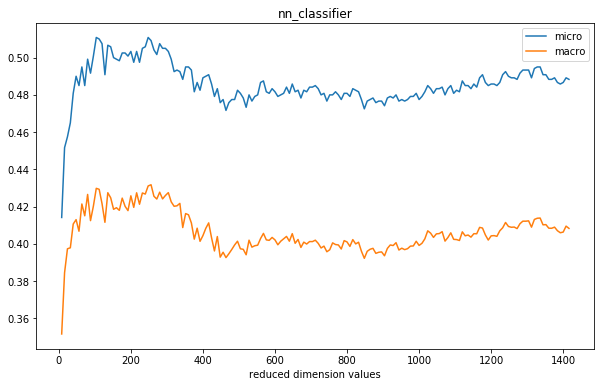

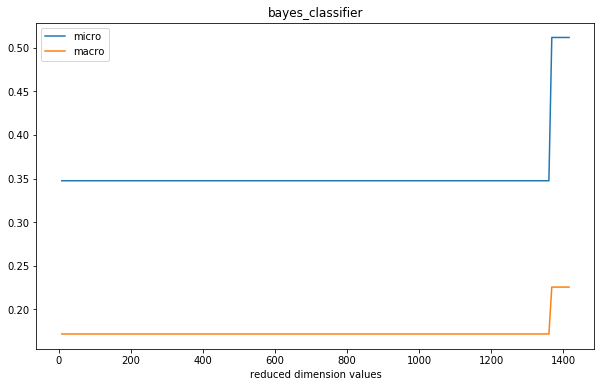

([0.4141666666666667,
  0.45166666666666666,
  0.4575,
  0.465,
  0.48083333333333333,
  0.49,
  0.485,
  0.495,
  0.485,
  0.49916666666666665,
  0.49166666666666664,
  0.5008333333333334,
  0.5108333333333334,
  0.51,
  0.5075,
  0.49083333333333334,
  0.5066666666666667,
  0.5058333333333334,
  0.5,
  0.49916666666666665,
  0.49833333333333335,
  0.5025,
  0.5025,
  0.5008333333333334,
  0.5033333333333333,
  0.4975,
  0.5033333333333333,
  0.4975,
  0.505,
  0.5058333333333334,
  0.5108333333333334,
  0.5091666666666667,
  0.5041666666666667,
  0.5016666666666667,
  0.5075,
  0.505,
  0.505,
  0.5033333333333333,
  0.49916666666666665,
  0.4925,
  0.4933333333333334,
  0.4925,
  0.48833333333333334,
  0.495,
  0.495,
  0.4933333333333334,
  0.4816666666666667,
  0.4866666666666667,
  0.4825,
  0.4891666666666667,
  0.49,
  0.49083333333333334,
  0.48583333333333334,
  0.4791666666666667,
  0.48333333333333334,
  0.47583333333333333,
  0.4775,
  0.4716666666666666,
  0.4758333333333

In [14]:
twit_data = preprocess_text_data(data_path+"twitter\\twitter.txt")
twit_label = read_label_from_text_file(data_path+"twitter\\twitter_label.txt")
experiment_with_random_proj(twit_data, twit_label,bow=True)

In [15]:
micro_nn = [0.4141666666666667,
  0.45166666666666666,
  0.4575,
  0.465,
  0.48083333333333333,
  0.49,
  0.485,
  0.495,
  0.485,
  0.49916666666666665,
  0.49166666666666664,
  0.5008333333333334,
  0.5108333333333334,
  0.51,
  0.5075,
  0.49083333333333334,
  0.5066666666666667,
  0.5058333333333334,
  0.5,
  0.49916666666666665,
  0.49833333333333335,
  0.5025,
  0.5025,
  0.5008333333333334,
  0.5033333333333333,
  0.4975,
  0.5033333333333333,
  0.4975,
  0.505,
  0.5058333333333334,
  0.5108333333333334,
  0.5091666666666667,
  0.5041666666666667,
  0.5016666666666667,
  0.5075,
  0.505,
  0.505,
  0.5033333333333333,
  0.49916666666666665,
  0.4925,
  0.4933333333333334,
  0.4925,
  0.48833333333333334,
  0.495,
  0.495,
  0.4933333333333334,
  0.4816666666666667,
  0.4866666666666667,
  0.4825,
  0.4891666666666667,
  0.49,
  0.49083333333333334,
  0.48583333333333334,
  0.4791666666666667,
  0.48333333333333334,
  0.47583333333333333,
  0.4775,
  0.4716666666666666,
  0.47583333333333333,
  0.4775,
  0.4775,
  0.4825,
  0.48083333333333333,
  0.47833333333333333,
  0.47333333333333333,
  0.48,
  0.4766666666666667,
  0.4791666666666667,
  0.48,
  0.4866666666666667,
  0.4875,
  0.4816666666666667,
  0.48083333333333333,
  0.48333333333333334,
  0.4816666666666667,
  0.4791666666666667,
  0.48,
  0.48083333333333333,
  0.4841666666666667,
  0.48083333333333333,
  0.48583333333333334,
  0.4816666666666667,
  0.4825,
  0.47833333333333333,
  0.4825,
  0.4816666666666667,
  0.4841666666666667,
  0.4841666666666667,
  0.485,
  0.48333333333333334,
  0.48,
  0.48083333333333333,
  0.4766666666666667,
  0.48,
  0.48,
  0.4816666666666667,
  0.48,
  0.4775,
  0.48083333333333333,
  0.48083333333333333,
  0.4791666666666667,
  0.48333333333333334,
  0.4825,
  0.4816666666666667,
  0.4775,
  0.4725,
  0.4766666666666667,
  0.4775,
  0.47833333333333333,
  0.47583333333333333,
  0.4766666666666667,
  0.4766666666666667,
  0.4741666666666667,
  0.47833333333333333,
  0.4791666666666667,
  0.47833333333333333,
  0.48,
  0.4766666666666667,
  0.4775,
  0.4766666666666667,
  0.4775,
  0.4791666666666667,
  0.4791666666666667,
  0.48083333333333333,
  0.4775,
  0.4791666666666667,
  0.4816666666666667,
  0.485,
  0.48333333333333334,
  0.48083333333333333,
  0.48333333333333334,
  0.48333333333333334,
  0.4841666666666667,
  0.48,
  0.48333333333333334,
  0.485,
  0.48083333333333333,
  0.4825,
  0.4816666666666667,
  0.4875,
  0.485,
  0.485,
  0.48333333333333334,
  0.48583333333333334,
  0.4841666666666667,
  0.4891666666666667,
  0.49083333333333334,
  0.4866666666666667,
  0.485,
  0.48583333333333334,
  0.48583333333333334,
  0.485,
  0.4866666666666667,
  0.49083333333333334,
  0.4925,
  0.49,
  0.4891666666666667,
  0.4891666666666667,
  0.48833333333333334,
  0.49166666666666664,
  0.4933333333333334,
  0.4933333333333334,
  0.4933333333333334,
  0.4891666666666667,
  0.49416666666666664,
  0.495,
  0.495,
  0.49083333333333334,
  0.49083333333333334,
  0.48833333333333334,
  0.48833333333333334,
  0.4891666666666667,
  0.4866666666666667,
  0.48583333333333334,
  0.4866666666666667,
  0.4891666666666667,
  0.48833333333333334]

In [17]:
micro_bayes = [0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.3475,
  0.5116666666666667,
  0.5116666666666667,
  0.5116666666666667,
  0.5116666666666667,
  0.5116666666666667,
  0.5116666666666667,
  0.5116666666666667]

C:\Users\vissim\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


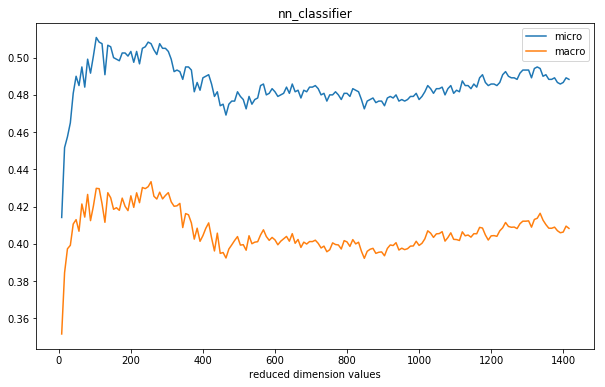

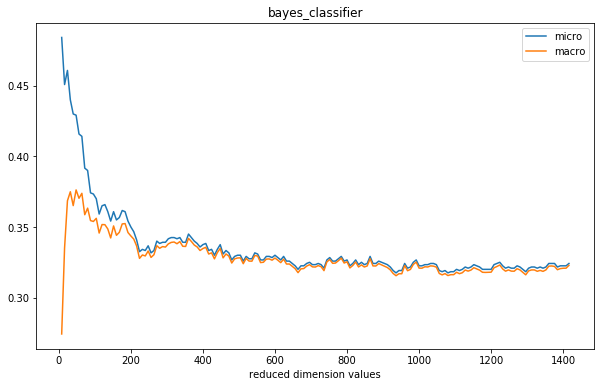

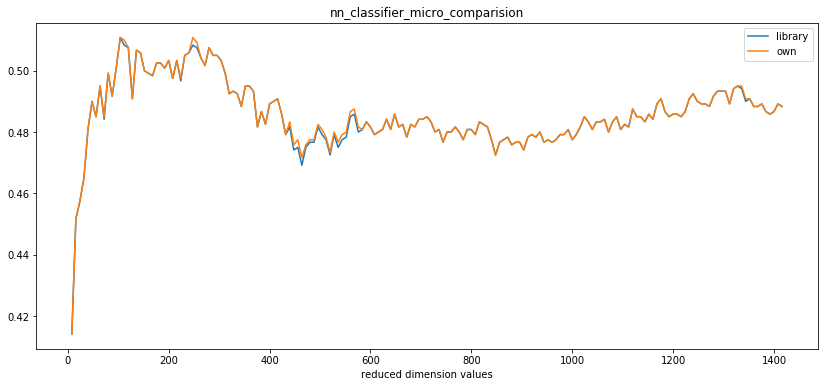

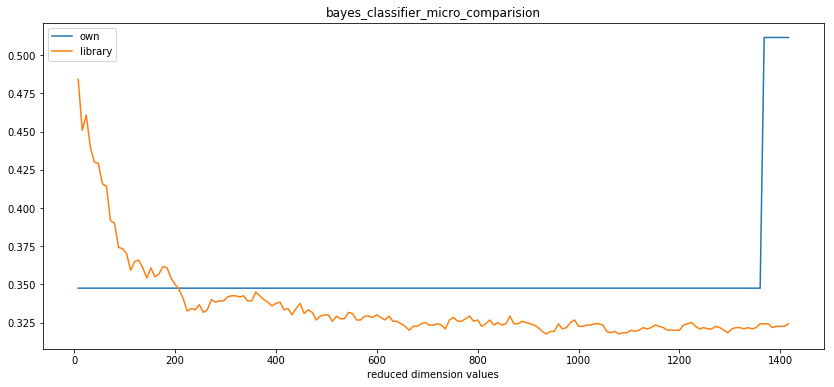

In [22]:
dolph_data = preprocess_text_data(data_path+"twitter\\twitter.txt")
dolph_label = read_label_from_text_file(data_path+"twitter\\twitter_label.txt")
lsh_micro_nn,_,lsh_micro_b,_ = experiment_with_random_proj_using_scikit_library(dolph_data, dolph_label,bow = False)
full_dim = dolph_data.shape[1]
red_dim = [8*i for i in range(1,int(full_dim/16)+1)]
plt.figure(figsize=(14,6))
plt.xlabel("reduced dimension values")
plt.plot(red_dim, lsh_micro_nn, label = "library")
plt.plot(red_dim, micro_nn, label="own")

plt.title("nn_classifier_micro_comparision")
plt.legend()
plt.show()
plt.figure(figsize=(14,6))
plt.xlabel("reduced dimension values")
plt.plot(red_dim, micro_bayes, label="own")
plt.plot(red_dim, lsh_micro_b, label = "library")
plt.title("bayes_classifier_micro_comparision")
plt.legend()
plt.show()

## below codes are just to write to file for task3 and task 4

In [61]:
dolph_train, dolph_train_lab, dolph_test, dolph_test_lab = split_train_test(dolph_data, dolph_label)
nn = NearestNeighbour()
nn.fit(dolph_train, dolph_train_lab)
pred_lab = nn.predict(dolph_test)
print(f1_score(dolph_test_lab, pred_lab, average = "micro"))
print(f1_score(dolph_test_lab, pred_lab, average = "macro"))
print(accuracy_score(dolph_test_lab, pred_lab))
with open("..\\output_data\\task_3.txt","a") as f:
    f.write("dolphins dataset full dimension")
    f.write("Nearest Neighbour \n")
    f.write("Test Accuracy :: 100.00 \n")
    f.write("Test Macro F1-score :: "+ "100.00"+"\n")
    f.write("Test Micro F1-score :: "+ "100.00"+"\n")
    f.write("Bayes Classifier \n")
    f.write("Test Accuracy :: 100.00 \n")
    f.write("Test Macro F1-score :: "+ "100.00" +"\n")
    f.write("Test Macro F1-score :: "+ "100.00" +"\n")

1.0
1.0
1.0


In [7]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(dolph_train, dolph_train_lab)
neigh.predict(dolph_test)

array([1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0], dtype=int64)

### now bayes classifier on this dataset

In [29]:
b_clf = BayesClf()
prior,_ = b_clf.fit(dolph_train, dolph_train_lab)

In [30]:
pred_lab = b_clf.predict(dolph_test)

H:\sonu\tipr\Assignment1\src\BayesClf.py:27: RuntimeWarning: divide by zero encountered in log
  log_density = np.log(np.exp(-0.5 * (((data-params[0])/params[1]) ** 2.0)) * 1/(params[1] * np.sqrt(2*np.pi)))


In [31]:
pred_lab

[1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0]

In [32]:
dolph_test_lab

array([1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0], dtype=int64)

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(dolph_train, dolph_train_lab).predict(dolph_test)

array([1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0], dtype=int64)

In [62]:
with open("..\\output_data\\task_4.txt","a") as f:
    f.write("dolphins dataset full dimension")
    f.write("Nearest Neighbour \n")
    f.write("Test Accuracy :: 100.00 \n")
    f.write("Test Macro F1-score :: "+ "100.00"+"\n")
    f.write("Test Micro F1-score :: "+ "100.00"+"\n")
    f.write("Bayes Classifier \n")
    f.write("Test Accuracy :: 100.00 \n")
    f.write("Test Macro F1-score :: "+ "100.00" +"\n")
    f.write("Test Macro F1-score :: "+ "100.00" +"\n")

## pubmed dataset

In [63]:
pubmed_data = data_read_convert_to_np_array(data_path+"pubmed\\pubmed.csv")
pubmed_label = data_read_convert_to_np_array(data_path+"pubmed\\pubmed_label.csv")
pubmed_train, pubmed_train_lab, pubmed_test, pubmed_test_lab = split_train_test(
    pubmed_data, pubmed_label)

In [64]:
nn = NearestNeighbour()
nn.fit(pubmed_train, pubmed_train_lab)
pred_lab = nn.predict(pubmed_test)

print("acc ", accuracy_score(pubmed_test_lab, pred_lab))
print("macro ",f1_score(pubmed_test_lab, pred_lab, average = "macro"))
print("micro ",f1_score(pubmed_test_lab, pred_lab, average = "micro"))

b_clf = BayesClf()
prior,_ = b_clf.fit(pubmed_train, pubmed_train_lab)
pred_lab = b_clf.predict(pubmed_test)
print("acc ", accuracy_score(pubmed_test_lab, pred_lab))
print("macro ",f1_score(pubmed_test_lab, pred_lab, average = "macro"))
print("micro ",f1_score(pubmed_test_lab, pred_lab, average = "micro"))

acc  0.3746376811594203
macro  0.34881362053702913
micro  0.37463768115942037
acc  0.42995169082125606
macro  0.3188982090006239
micro  0.42995169082125606


In [65]:
with open("..\\output_data\\task_3.txt","a") as f:
    f.write("pubmed dataset full dimension")
    f.write("Nearest Neighbour \n")
    f.write("Test Accuracy :: 37.46 \n")
    f.write("Test Macro F1-score :: "+ "34.88"+"\n")
    f.write("Test Micro F1-score :: "+ "37.46"+"\n")
    f.write("Bayes Classifier \n")
    f.write("Test Accuracy :: 42.99 \n")
    f.write("Test Macro F1-score :: "+ "31.88" +"\n")
    f.write("Test Macro F1-score :: "+ "42.99" +"\n")

## using library functions

In [66]:

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(pubmed_train, pubmed_train_lab)
pred_lab = neigh.predict(pubmed_test)
print("acc ", accuracy_score(pubmed_test_lab, pred_lab))
print("macro ",f1_score(pubmed_test_lab, pred_lab, average = "macro"))
print("micro ",f1_score(pubmed_test_lab, pred_lab, average = "micro"))

gnb = GaussianNB()
pred_lab = gnb.fit(pubmed_train, pubmed_train_lab).predict(pubmed_test)
print("acc ", accuracy_score(pubmed_test_lab, pred_lab))
print("macro ",f1_score(pubmed_test_lab, pred_lab, average = "macro"))
print("micro ",f1_score(pubmed_test_lab, pred_lab, average = "micro"))

acc  0.3746376811594203
macro  0.34881362053702913
micro  0.37463768115942037
acc  0.42294685990338166
macro  0.39407247578177906
micro  0.42294685990338166


In [67]:
with open("..\\output_data\\task_4.txt","a") as f:
    f.write("pubmed dataset full dimension")
    f.write("Nearest Neighbour \n")
    f.write("Test Accuracy :: 37.46 \n")
    f.write("Test Macro F1-score :: "+ "34.88"+"\n")
    f.write("Test Micro F1-score :: "+ "37.46"+"\n")
    f.write("Bayes Classifier \n")
    f.write("Test Accuracy :: 42.29 \n")
    f.write("Test Macro F1-score :: "+ "39.40" +"\n")
    f.write("Test Macro F1-score :: "+ "42.29" +"\n")

## twitter dataset

In [68]:
twit_data = preprocess_text_data(data_path+"twitter\\twitter.txt")
twit_label = read_label_from_text_file(data_path+"twitter\\twitter_label.txt")
print(twit_data.shape)
# twit_label += 1
# twit_data += 1  ##laplace smoothening
twit_tr, twit_tr_lab, twit_test, twit_test_lab = split_train_test(
    twit_data, twit_label)

(6000, 2845)


In [70]:
nn = NearestNeighbour()
nn.fit(twit_tr, twit_tr_lab)
pred_lab = nn.predict(twit_test)

print("acc ", accuracy_score(twit_test_lab, pred_lab))
print("macro ",f1_score(twit_test_lab, pred_lab, average = "macro"))
print("micro ",f1_score(twit_test_lab, pred_lab, average = "micro"))

twit_label += 1
twit_tr, twit_tr_lab, twit_test, twit_test_lab = split_train_test(
    twit_data, twit_label)
b_clf = BayesClf()
prior,_ = b_clf.fit(twit_tr, twit_tr_lab,bow = True)
pred_lab = b_clf.predict(twit_test)
print("acc ", accuracy_score(twit_test_lab, pred_lab))
print("macro ",f1_score(twit_test_lab, pred_lab, average = "macro"))
print("micro ",f1_score(twit_test_lab, pred_lab, average = "micro"))

acc  0.49
macro  0.40579847181757733
micro  0.49
acc  0.5766666666666667
macro  0.5078050086114603
micro  0.5766666666666667


In [71]:
with open("..\\output_data\\task_3.txt","a") as f:
    f.write("twitter dataset full dimension")
    f.write("Nearest Neighbour \n")
    f.write("Test Accuracy :: 49.00 \n")
    f.write("Test Macro F1-score :: "+ "40.57"+"\n")
    f.write("Test Micro F1-score :: "+ "49.00"+"\n")
    f.write("Bayes Classifier \n")
    f.write("Test Accuracy :: 57.66 \n")
    f.write("Test Macro F1-score :: "+ "50.78" +"\n")
    f.write("Test Macro F1-score :: "+ "57.66" +"\n")

In [73]:
nn = KNeighborsClassifier(n_neighbors=1)
nn.fit(twit_tr, twit_tr_lab)
pred_lab = nn.predict(twit_test)

print("acc ", accuracy_score(twit_test_lab, pred_lab))
print("macro ",f1_score(twit_test_lab, pred_lab, average = "macro"))
print("micro ",f1_score(twit_test_lab, pred_lab, average = "micro"))

twit_label += 1
twit_tr, twit_tr_lab, twit_test, twit_test_lab = split_train_test(
    twit_data, twit_label)
b_clf = MultinomialNB()
pred_lab = b_clf.fit(twit_tr, twit_tr_lab).predict(twit_test)

print("acc ", accuracy_score(twit_test_lab, pred_lab))
print("macro ",f1_score(twit_test_lab, pred_lab, average = "macro"))
print("micro ",f1_score(twit_test_lab, pred_lab, average = "micro"))

acc  0.4891666666666667
macro  0.4079278112753603
micro  0.4891666666666667
acc  0.5766666666666667
macro  0.5078050086114603
micro  0.5766666666666667


In [74]:
with open("..\\output_data\\task_4.txt","a") as f:
    f.write("twitter dataset full dimension")
    f.write("Nearest Neighbour \n")
    f.write("Test Accuracy :: 48.91 \n")
    f.write("Test Macro F1-score :: "+ "40.72"+"\n")
    f.write("Test Micro F1-score :: "+ "48.91"+"\n")
    f.write("Bayes Classifier \n")
    f.write("Test Accuracy :: 57.66 \n")
    f.write("Test Macro F1-score :: "+ "50.78" +"\n")
    f.write("Test Macro F1-score :: "+ "57.66" +"\n")

In [11]:
clf = MultinomialNB()
pred_lab = clf.fit(twit_tr, twit_tr_lab).predict(twit_test)
print()
print("macro ",f1_score(twit_test_lab, pred_lab, average = "macro"))
print("micro ",f1_score(twit_test_lab, pred_lab, average = "micro"))

macro  0.5078050086114603
micro  0.5766666666666667


In [12]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(twit_tr, twit_tr_lab)
pred_lab = neigh.predict(twit_test)
print("macro ",f1_score(twit_test_lab, pred_lab, average = "macro"))
print("micro ",f1_score(twit_test_lab, pred_lab, average = "micro"))

macro  0.4357084735113814
micro  0.5


In [13]:
nn = NearestNeighbour(3)
nn.fit(twit_tr, twit_tr_lab)
pred_lab = nn.predict(twit_test)
from sklearn.metrics import f1_score
print(f1_score(twit_test_lab, pred_lab, average = "macro"))
print(f1_score(twit_test_lab, pred_lab, average = "micro"))

0.4408182329783248
0.5216666666666666
